#### Importing libraries

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM,GRU,Flatten
import tensorflow as tf
import seaborn as sns
from numpy import mean, std, dstack
from keras.utils import to_categorical

#### Extracting data

In [ ]:
d1 = pd.read_csv('Dataset/train.csv')
d2 = pd.read_csv('Dataset/test.csv')
d1 = np.vstack((d1,d2))
# d1.shape
df = pd.DataFrame(d1)
print(df.head())

        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411  -0.12352 -0.998245   -0.9753 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462  -0.99538 -0.967187 -0.978944  -0.99652   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629  -0.01657 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       553       554       555       556  \
0 -0.983185 -0.923527 -0.934724  ... -0.710304 -0.112754    0.0304 -0.464761   
1 -0.974914 -0.957686 -0.943068  ... -0.861499  0.053477 -0.007435 -0.732626   
2 -0.963668 -0.977469 -0.938692  ... -0.760104 -0.118559  0.177899  0.100699   
3  -0.98275 -0.989302 -0.938692  ... -0.482845 -0.036788 -0.012892  0.640011   
4 -0.979672 -0.990441 -0.942469  ... -0.699205   0.12332  0.122542  0.693578   

        557       558       559       560 561       562  
0 -0.01844

In [ ]:
# Activities to be detected
df[562].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
X = df[df.columns[:-2]]
Y = df[562]
# X.shape
# Y.shape

#### Feature scaling

In [ ]:
# Feature scaling using Standard Scaler - to normaLIZE THE RANGE OF FEATURES
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(X))
print('Feature vectors shape:', scaled_feature_vectors.shape)
# Encoding of labels using Label Encoder
# Label encoding converts categorical values to numerical values for mathematic computations
encode = LabelEncoder()
labels = Y
encode.fit(labels)
print(len(encode.classes_), 'Classes:', ','.join(list(encode.classes_)))
classes = encode.transform(labels)

Feature vectors shape: (10299, 561)
6 Classes: LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS


#### Splitting of data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_vectors, classes, test_size=0.3, random_state=42)

#### Implementation of ML & DL models

The following models were implemented:
    
    - Naive Bayes
    
    - SVM with RBF kernel
    
    - RF
    
    - LR
    
    - LSTM

In [ ]:
# initialize model instances
NB_model = GaussianNB()
SVM_model = SVC(gamma='auto', C=10, kernel='rbf', probability=True)
RF_model = RandomForestClassifier(max_depth= 20 , n_estimators = 100 , random_state=42)
# no of splits for each DT, no of total DT to be made, controls randomness of sample o/w same o/p will come, other hyperparametrs like max_features, max_leaf_nodes
LR_model = LogisticRegression()

In [ ]:
# Naive Bayes
NB_model.fit(X_train, y_train)
NB_predicted = NB_model.predict(X_test)
print(classification_report(y_test , NB_predicted , target_names = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']))

                    precision    recall  f1-score   support

            LAYING       0.98      0.55      0.71       597
           SITTING       0.43      0.91      0.58       563
          STANDING       0.81      0.23      0.36       547
           WALKING       0.92      0.73      0.81       539
WALKING_DOWNSTAIRS       0.78      0.77      0.78       420
  WALKING_UPSTAIRS       0.68      0.91      0.78       424

          accuracy                           0.67      3090
         macro avg       0.77      0.68      0.67      3090
      weighted avg       0.77      0.67      0.66      3090



<Axes: >

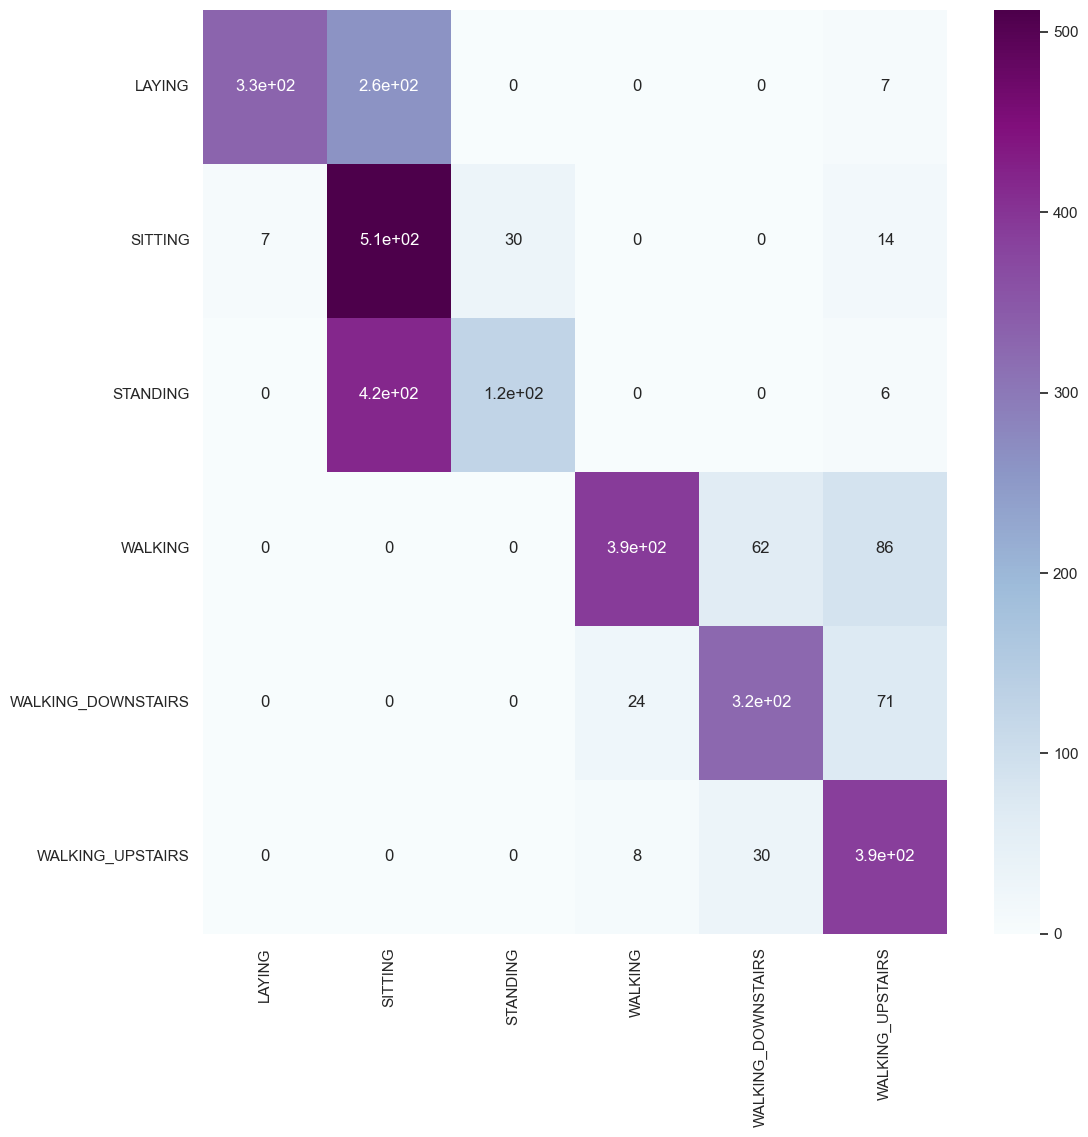

In [ ]:
classes = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
NB_cf_matrix = confusion_matrix(y_test, NB_predicted)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(NB_cf_matrix, annot=True , cmap = 'BuPu', xticklabels=classes ,yticklabels=classes)

In [ ]:
# SVM
SVM_model.fit(X_train, y_train)
SVM_predicted = SVM_model.predict(X_test)
print(classification_report(y_test , SVM_predicted , target_names = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       597
           SITTING       0.97      0.96      0.96       563
          STANDING       0.97      0.97      0.97       547
           WALKING       1.00      1.00      1.00       539
WALKING_DOWNSTAIRS       0.99      1.00      1.00       420
  WALKING_UPSTAIRS       0.99      0.99      0.99       424

          accuracy                           0.98      3090
         macro avg       0.98      0.99      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



<Axes: >

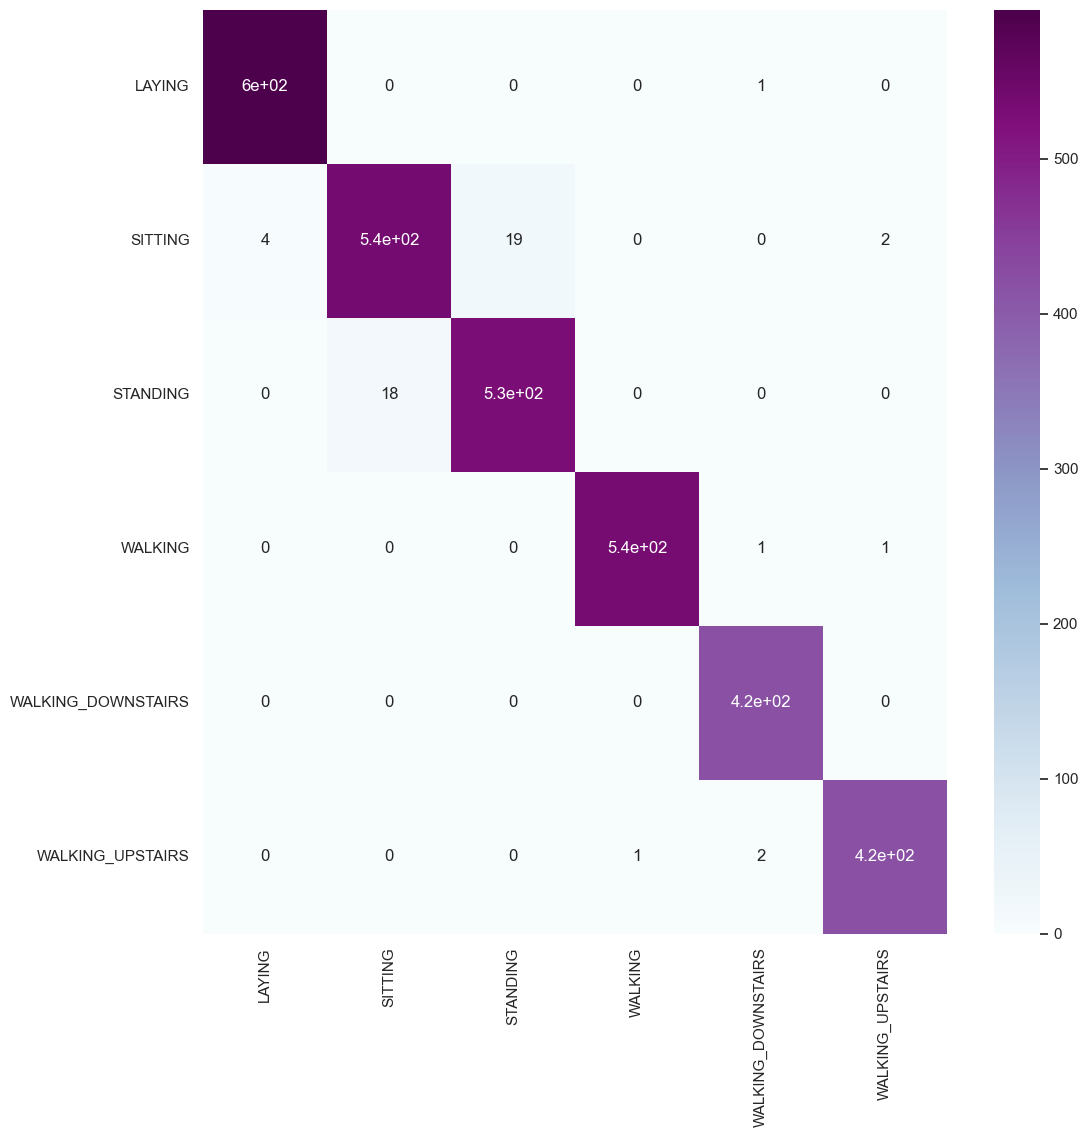

In [ ]:
classes = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
SVM_cf_matrix = confusion_matrix(y_test, SVM_predicted)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(SVM_cf_matrix, annot=True , cmap = 'BuPu', xticklabels=classes ,yticklabels=classes)

In [ ]:
# Random Forest
RF_model.fit(X_train, y_train)
RF_predicted = RF_model.predict(X_test)
print(classification_report(y_test , RF_predicted , target_names = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       597
           SITTING       0.96      0.95      0.95       563
          STANDING       0.95      0.96      0.95       547
           WALKING       0.99      0.99      0.99       539
WALKING_DOWNSTAIRS       0.98      0.97      0.97       420
  WALKING_UPSTAIRS       0.97      0.98      0.98       424

          accuracy                           0.98      3090
         macro avg       0.98      0.98      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



<Axes: >

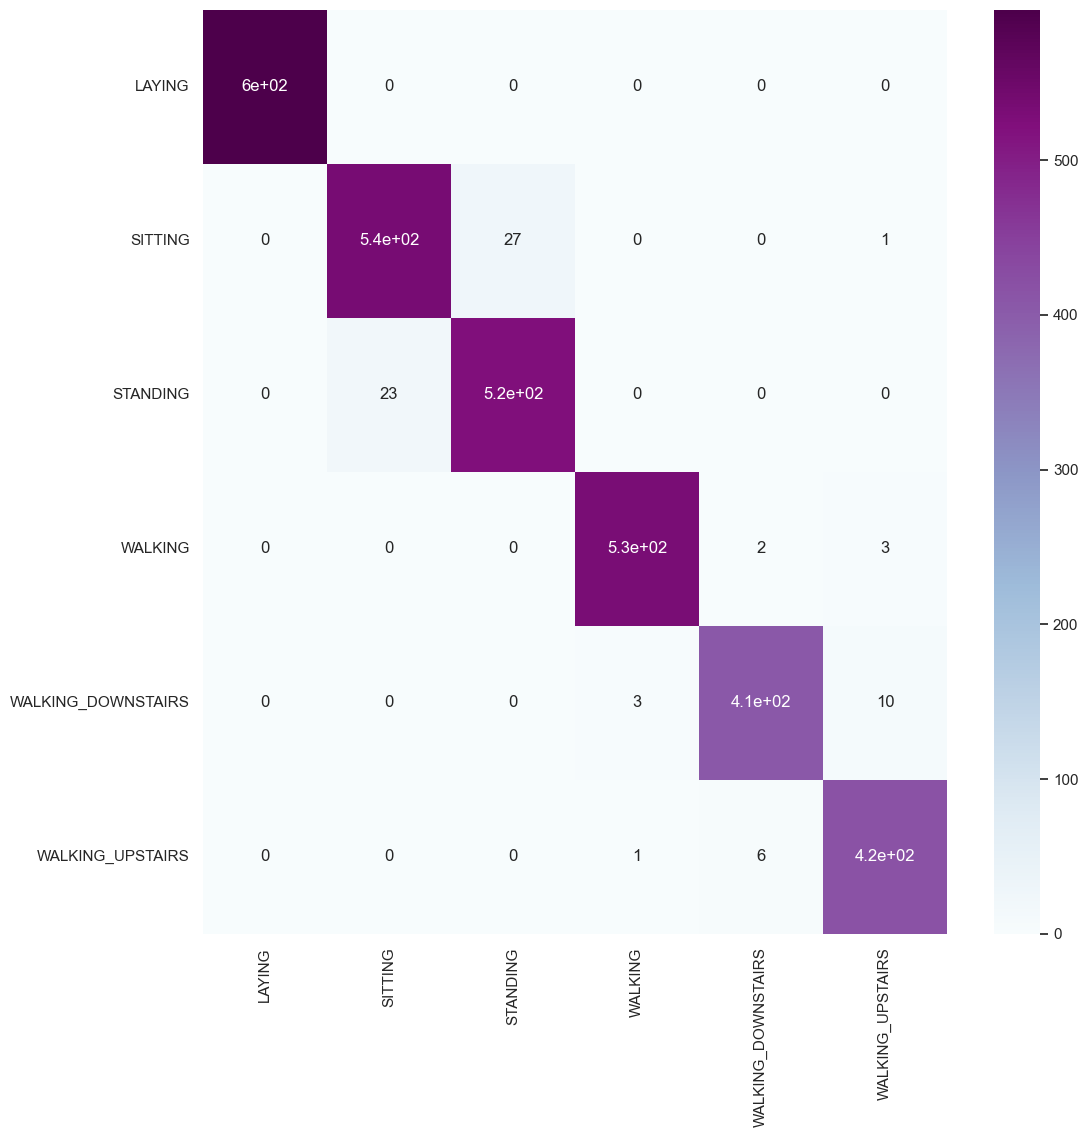

In [ ]:
classes = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
RF_cf_matrix = confusion_matrix(y_test, RF_predicted)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(RF_cf_matrix, annot=True , cmap = 'BuPu', xticklabels=classes ,yticklabels=classes)

In [ ]:
# Logistic regression
LR_model.fit(X_train, y_train)
LR_predicted = LR_model.predict(X_test)
print(classification_report(y_test , LR_predicted , target_names = classes))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       597
           SITTING       0.97      0.94      0.95       563
          STANDING       0.95      0.97      0.96       547
           WALKING       1.00      1.00      1.00       539
WALKING_DOWNSTAIRS       1.00      0.99      0.99       420
  WALKING_UPSTAIRS       0.99      1.00      0.99       424

          accuracy                           0.98      3090
         macro avg       0.98      0.98      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

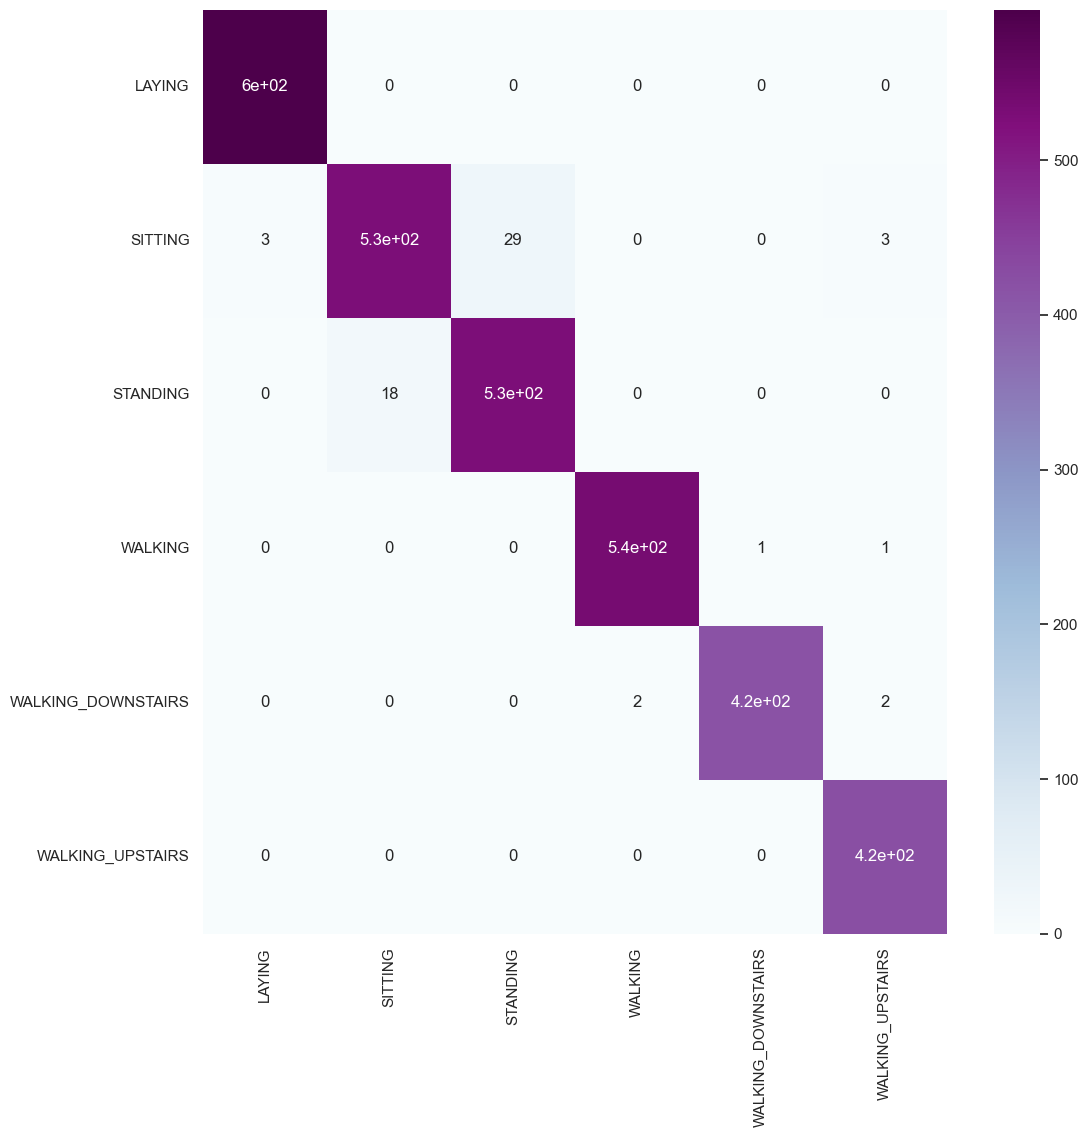

In [ ]:
classes = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
LR_cf_matrix = confusion_matrix(y_test, LR_predicted)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(LR_cf_matrix, annot=True , cmap = 'BuPu', xticklabels = classes ,yticklabels= classes )

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
93/93 [==============================] - 4s 30ms/step
#1: 89.786
    AUC: 0.988
93/93 [==============================] - 4s 33ms/step
#2: 87.988
    AUC: 0.984
93/93 [==============================] - 3s 31ms/step
#3: 88.056
    AUC: 0.986
93/93 [==============================] - 4s 34ms/step
#4: 88.938
    AUC: 0.989
93/93 [==============================] - 4s 39ms/step
#5: 89.583
    AUC: 0.987
93/93 [==============================] - 4s 36ms/step
#6: 89.209
    AUC: 0.987
93/93 [==============================] - 4s 36ms/step
#7: 91.992
    AUC: 0.991
93/93 [==============================] - 4s 37ms/step
#8: 89.379
    AUC: 0.975
93/93 [==============================] - 3s 30ms/step
#9: 89.277
    AUC: 0.983
93/93 [==============================] - 3s 28ms/step
#10: 89.175
    AUC: 0.989
[89.78622555732727, 87.98778653144836, 88.05565237998962, 88.93790245056152, 89.58262801170349, 89.

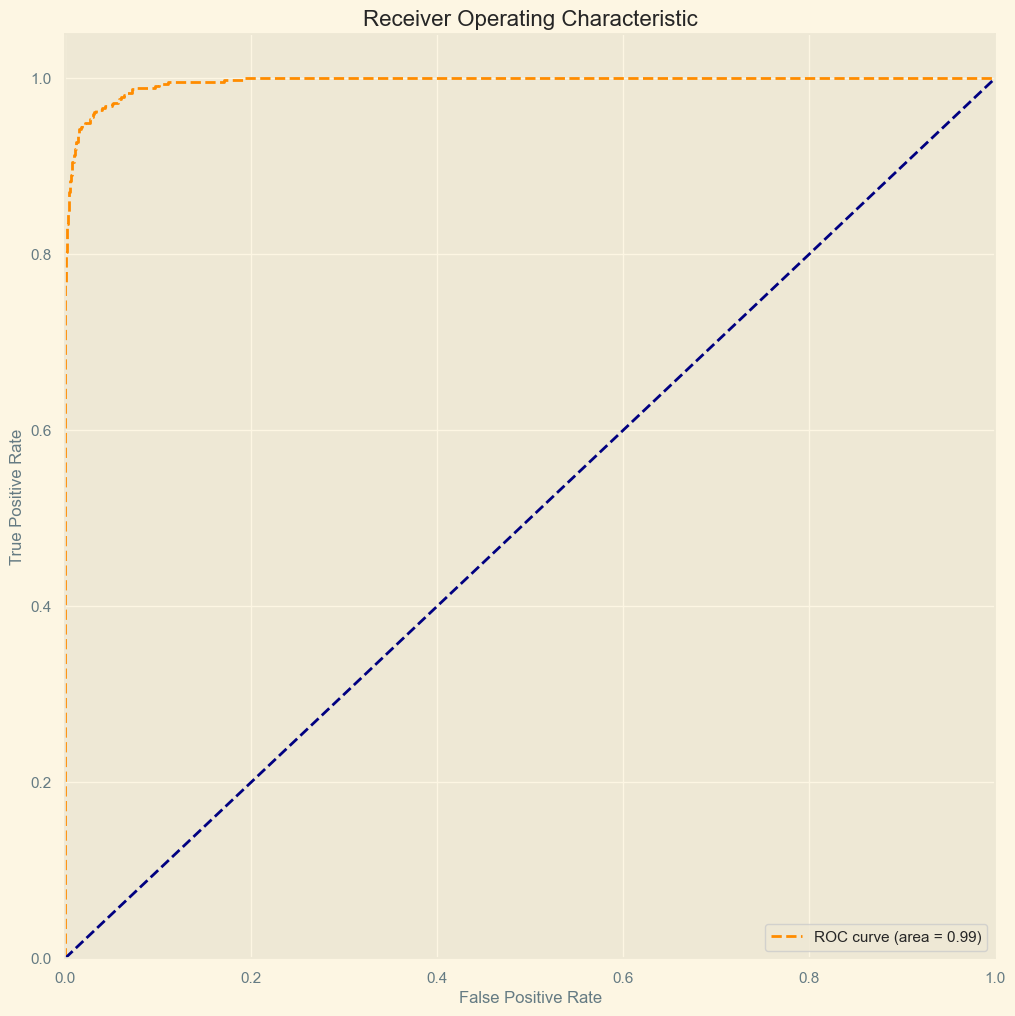

([array([[6.6304777e-04, 2.3486480e-04, 1.5994277e-05, 4.0591508e-02,
          9.5848787e-01, 6.7725973e-06],
         [5.8906741e-04, 2.1553204e-04, 1.3886039e-05, 3.7192576e-02,
          9.6198308e-01, 5.8221126e-06],
         [5.8017246e-04, 2.0819328e-04, 1.3041872e-05, 3.5533059e-02,
          9.6366030e-01, 5.3171370e-06],
         ...,
         [2.1357469e-03, 9.9009424e-01, 7.7656559e-03, 1.0743005e-06,
          3.0116946e-06, 2.7076987e-07],
         [1.6847201e-02, 9.7833580e-01, 4.7689187e-03, 1.5834672e-05,
          2.5207533e-05, 7.0982137e-06],
         [1.4591516e-02, 9.8338163e-01, 1.9725626e-03, 1.3319631e-05,
          2.0377467e-05, 2.0586354e-05]], dtype=float32),
  array([[7.7017292e-04, 5.3195172e-04, 2.0407220e-05, 2.4856277e-02,
          9.7380435e-01, 1.6851049e-05],
         [4.9973262e-04, 3.3784800e-04, 1.1412542e-05, 1.9404765e-02,
          9.7973722e-01, 8.9766045e-06],
         [4.6344614e-04, 3.1182967e-04, 9.9184917e-06, 1.8299107e-02,
          9

<Figure size 1200x1200 with 0 Axes>

In [ ]:
# LSTM Network Model

def load_file(filepath):
	dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	loaded = dstack(loaded)
	return loaded

def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	filenames = list()
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	X = load_group(filenames, filepath)
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

def load_dataset(prefix=''):
	trainX, trainy = load_dataset_group('train', prefix + 'UCI HAR Dataset/')
	print(trainX.shape, trainy.shape)
	testX, testy = load_dataset_group('test', prefix + 'UCI HAR Dataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values since class label starts from 1
	trainy = trainy - 1
	testy = testy - 1
	# one hot encoding of y 
    # converting data related to the catergory as 1
    # rest are set to 0
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 10, 64
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu')) # f(x) = max(x,0)
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # Predict probabilities for test data
    y_pred_prob = model.predict(testX)
    # Calculate AUC
    fpr, tpr, thresholds = roc_curve(testy[:, 1], y_pred_prob[:, 1])
    roc_auc = roc_auc_score(testy, y_pred_prob)
    accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy , y_pred_prob, fpr, tpr, roc_auc

def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

def run(repeats=10):
    probabilities = []
    auc_values = []
    scores = []
    trainX, trainy, testX, testy = load_dataset()
    for r in range(repeats):
        accuracy, y_pred_prob, fpr, tpr, roc_auc = evaluate_model(trainX, trainy, testX, testy)
        accuracy = accuracy * 100.0
        print('#%d: %.3f' % (r+1, accuracy))
        print('AUC: %.3f' % roc_auc)
        scores.append(accuracy)
        probabilities.append(y_pred_prob)
        auc_values.append(roc_auc)
    summarize_results(scores)
    plt.style.use('Solarize_Light2')
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', linestyle='--', label='LSTM ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    plt.savefig('LSTM_ROC',dpi=1000)
    return probabilities, auc_values

run()

#### AUC Visualization

In [ ]:
# predict probabilities of implemented models
pred_prob1 = NB_model.predict_proba(X_test)
pred_prob2 = SVM_model.predict_proba(X_test)
pred_prob3 = RF_model.predict_proba(X_test)
pred_prob4 = LR_model.predict_proba(X_test)

In [ ]:
# ROC curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
# ROC curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
# AUC scores
auc_score1 = roc_auc_score(y_test, pred_prob1,multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob2,multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob3,multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob4,multi_class='ovr')
print("NB AUC:", auc_score1)
print("SVM AUC:", auc_score2)
print("RF AUC:", auc_score3)
print("LR AUC:", auc_score4)

NB AUC: 0.9522997989561209
SVM AUC: 0.9996160075002236
RF AUC: 0.999328087759391
LR AUC: 0.9986992742783515


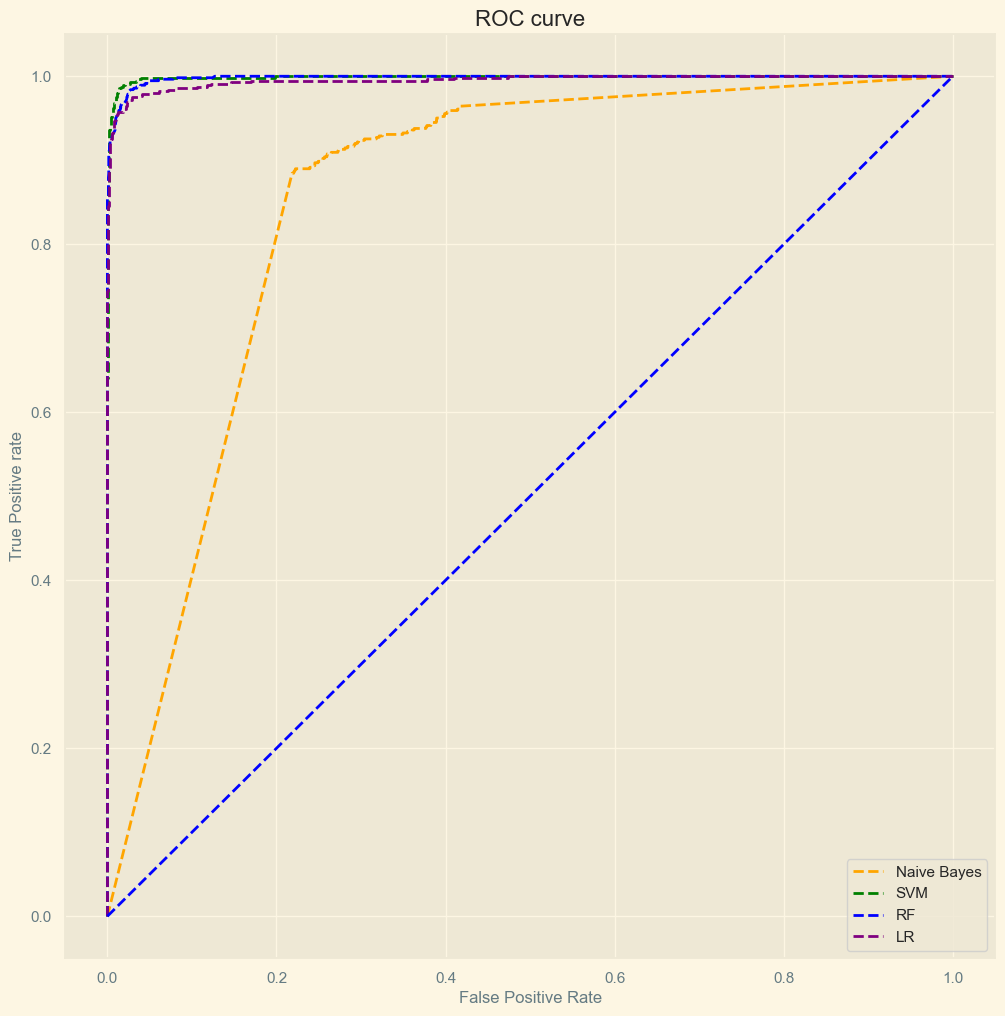

In [ ]:
plt.style.use('Solarize_Light2')
# plot ROC curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVM')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='RF')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='LR')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=1000)
plt.show();